# Preliminaries

Import datetime for timestamp

In [4]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-07-16 at 14:57 PM


Establish current working directory

In [5]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

Import LinearRegression from sklearn and instantiate

In [7]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

Import data

In [8]:
df = pd.read_csv('http://web.pdx.edu/~gerbing/data/Boston.csv')

View shape indicates 506 rows and 15 columns

In [9]:
df.shape

(506, 15)

View first 5 rows

In [10]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Drop unnecessary column

In [13]:
df = df.drop(columns=df.columns[0])
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Check for missing data

In [14]:
print(df.isna().sum())
print('\nTotal Missing: ', df.isna().sum().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Total Missing:  0


# Data Exploration

Check the distribution of the data set

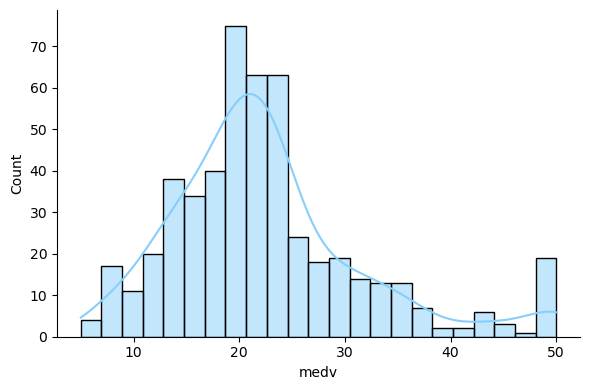

In [18]:
sns.displot(df.medv, kde=True, color='lightskyblue', height = 4, aspect=1.5)

All values above $50,000 appear to be truncated down to $50,000.

Examine the correlation of each feature according to its correlation with the target variable (medv). Sort results from smallest to largest.

In [19]:
(df
 .corr()['medv']
 .sort_values()
 .round(2)
)

lstat     -0.74
ptratio   -0.51
indus     -0.48
tax       -0.47
nox       -0.43
crim      -0.39
rad       -0.38
age       -0.38
chas       0.18
dis        0.25
black      0.33
zn         0.36
rm         0.70
medv       1.00
Name: medv, dtype: float64

Visualize heatmap to check correlations between predictor variables

<Axes: >

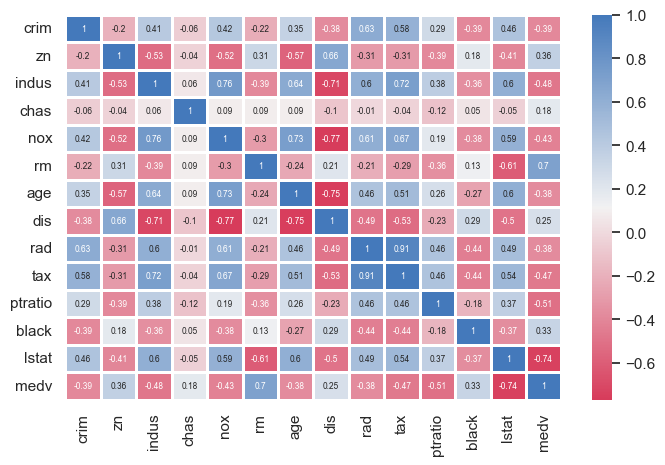

In [25]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.heatmap(df.corr().round(2), linewidths=1.0, #linewidths creates a gap between cells
            annot=True, annot_kws={'size': 6}, #annot adds the text in each cell
            cmap=sns.diverging_palette(5, 250, as_cmap=True))

# Create feature and target data structures

Store all predictor variables in data structure X, and store target variable in y.

In [28]:
y = df['medv']

pred_vars = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
X = df[pred_vars]

Count the number of predictor variables

In [29]:
n_pred = len(pred_vars)
print("Number of predictor variables: ", n_pred)

Number of predictor variables:  13


In [30]:
print('X: ', type(X))
print('y: ', type(y))

X:  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


### Single fold validation

Split data into train and test sets

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    # 25% of the data will be held for testing
                                                    test_size = .25, 
                                                    random_state= 7)

In [32]:
print('Size of X data structures: ', X_train.shape, X_test.shape)
print('Size of y data structures: ', y_train.shape, y_test.shape)

Size of X data structures:  (379, 13) (127, 13)
Size of y data structures:  (379,) (127,)


Apply the fit() function for linear regression by applying the reg_model instantiation of LinearRegression earlier.

In [33]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [34]:
reg_model.coef_

array([-1.29372986e-01,  2.95904870e-02,  2.22928425e-02,  2.83744579e+00,
       -1.53954203e+01,  5.27557273e+00, -1.05383841e-02, -1.30170765e+00,
        2.66392896e-01, -1.09686702e-02, -9.64830193e-01,  1.08603361e-02,
       -3.78363465e-01])

In [35]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

Convert reg_model to pandas data frame and view coefficients

In [36]:
print('intercept: %.3f' % (reg_model.intercept_), '\n')

cdf = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

intercept: 23.957 

         Coefficients
crim        -0.129373
zn           0.029590
indus        0.022293
chas         2.837446
nox        -15.395420
rm           5.275573
age         -0.010538
dis         -1.301708
rad          0.266393
tax         -0.010969
ptratio     -0.964830
black        0.010860
lstat       -0.378363


Calculate y-hat

In [37]:
y_fit = reg_model.predict(X_train)
y_pred = reg_model.predict(X_test)

In [39]:
if n_pred == 1: # if the number of predictor variables is 1, then make the scatterplot
    sns.regplot(x=X_train, y=y_train, color='lightskyblue')

# Since we have more than 1 predictor variable, the scatterplot did not generate

[Text(0.5, 0, 'y from testing data'), Text(0, 0.5, 'predicted value of y')]

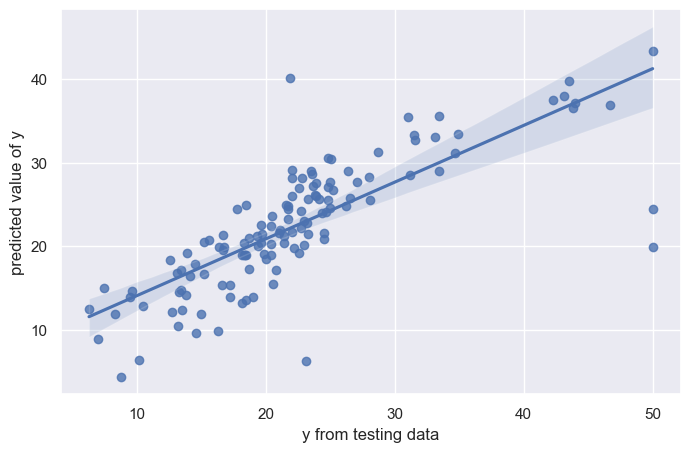

In [40]:
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y from testing data', ylabel='predicted value of y')

Evaluate the fit of the model with the training data

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_fit)
rsq = r2_score(y_train, y_fit)
print("MSE: %.3f" % mse)
se = np.sqrt(mse)
range95 = 4 * se
print("Stdev of residuals: %.3f " % se)
print("Approximate 95 per cent range of residuals: %.3f " % range95)
print("R-squared: %.3f" % rsq)

MSE: 20.266
Stdev of residuals: 4.502 
Approximate 95 per cent range of residuals: 18.007 
R-squared: 0.767


Compute the standard deviation of the residuals

In [43]:
e = y_train - y_fit 
print("stdev of residuals: %.3f " % np.sqrt(np.mean(e**2)))

stdev of residuals: 4.502 


Evaluate the actual performance of the model against test data

In [45]:
mse_f = mean_squared_error(y_test, y_pred)
rsq_f = r2_score(y_test, y_pred)
print('Forecasting Mean squared error: %.3f' % mse_f)
print('Forecasting Standard deviation of residuals: %.3f' % np.sqrt(mse_f))
print('Forecasting R-squared: %.3f' % rsq_f)

Forecasting Mean squared error: 29.515
Forecasting Standard deviation of residuals: 5.433
Forecasting R-squared: 0.617


Standard deviation drops from 4.502 to 5.433, and R-squared dropped form .767 to .617. The model is still a good fit.

### Model validation with multiple hold-out samples

Import KFold form sklearn to split the data into 5 folds. 

In [48]:
from sklearn.model_selection import KFold, cross_validate
# instantiate the KFold model with 5 splits, shuffle the data prior to split, and set the seed to recover same set in future.
kf = KFold(n_splits=5, shuffle=True, random_state=1) 

In [49]:
scores = cross_validate(reg_model, X, y, cv=kf,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

Convert scores into a DataFrame to interpret the results

In [54]:
ds = pd.DataFrame(scores)
ds

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.001373,0.000635,0.763417,0.729359,-23.380836,-21.862795
1,0.000846,0.000512,0.646814,0.758235,-28.614312,-20.502912
2,0.000770,0.000489,0.792148,0.726249,-15.160607,-23.793744
3,0.000755,0.000480,0.650751,0.757967,-27.208220,-20.818491
4,0.000763,0.000485,0.735259,0.740872,-23.371173,-21.607102


Rename the column names, convert MSE scores to positive numbers, and average the results

In [55]:
ds.rename(columns = {'test_neg_mean_squared_error': 'test_MSE', 
                     'train_neg_mean_squared_error': 'train_MSE'},
                     inplace=True)

ds['test_MSE'] = -ds['test_MSE']
ds['train_MSE'] = -ds['train_MSE']

print(ds.round(4))

   fit_time  score_time  test_r2  train_r2  test_MSE  train_MSE
0    0.0014      0.0006   0.7634    0.7294   23.3808    21.8628
1    0.0008      0.0005   0.6468    0.7582   28.6143    20.5029
2    0.0008      0.0005   0.7921    0.7262   15.1606    23.7937
3    0.0008      0.0005   0.6508    0.7580   27.2082    20.8185
4    0.0008      0.0005   0.7353    0.7409   23.3712    21.6071


Average the fit scores

In [57]:
print('Mean of test R-squared scores: %.3f' % ds['test_r2'].mean())
print('Mean of test MSE scores: %.3f' % ds['test_MSE'].mean())

se = np.sqrt(ds['test_MSE'].mean())
print('Standard deviation of mean test MSE scores: %.3f' % se)

Mean of test R-squared scores: 0.718
Mean of test MSE scores: 23.547
Standard deviation of mean test MSE scores: 4.853


The 13-predictor model fits well with average R-squared of 0.72. 